In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [25]:
# %%capture
# !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [26]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Трансформация признаков

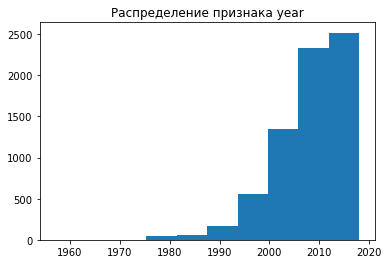

In [27]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование - QUANTILE TRANSFORMER

Этот метод трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

Квантильное преобразование сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

Квантильная функция, также называемая функцией процентной точки (PPF), является обратной функцией кумулятивного распределения вероятностей (CDF).

CDF — это функция, которая возвращает вероятность значения, равного или меньше заданного значения.

PPF является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.

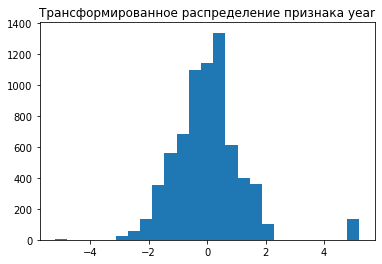

In [28]:
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

### Задание 6.1

Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

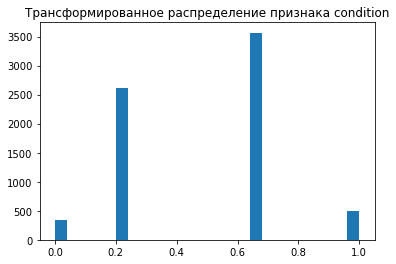

0.9639639639639639

In [37]:
data_for_transform_cond = data['condition'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed_cond = quantile.fit_transform(data_for_transform_cond)
 
plt.hist(data_transformed_cond, bins=25)
plt.title('Трансформированное распределение признака condition')
plt.show()
data_transformed_cond[0][0]


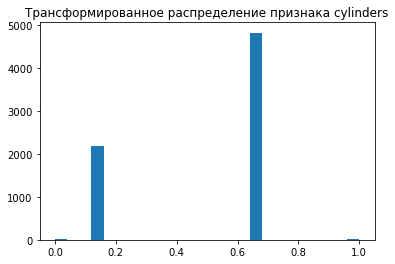

In [38]:
data_for_transform_cyl = data['cylinders'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed_cyl = quantile.fit_transform(data_for_transform_cyl)
 
plt.hist(data_transformed_cyl, bins=25)
plt.title('Трансформированное распределение признака cylinders')
plt.show()

## Логарифмическое преобразование

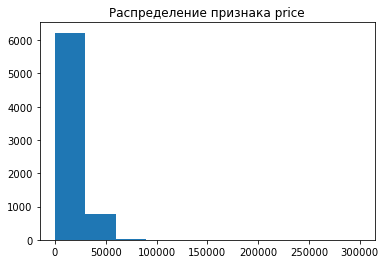

In [30]:
plt.hist(data.price)
plt.title('Распределение признака price');

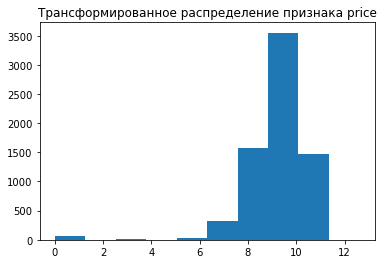

In [31]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [45]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
display(round(price_data['transformed_price'][7016], 2)) 
price_data.describe()

9.8

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


## Преобразование Бокса-Кокса

In [33]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


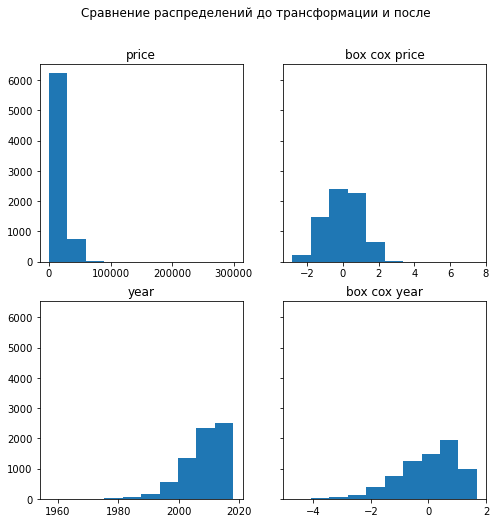

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()